# COSC 426 / 526 - Assignment 04
### Discussed: February 14, 2025
### Due: Feb 21, 2025
---

This notebook provides essential functions to help you complete your assignment. You should work within this notebook, modifying existing code and creating new code to devise a solution.  Each student must upload their own work (i.e., a notebook file and a well-executed README file) to GitHub.

**While solutions might be available online, I encourage you to embrace the challenge and try to develop your own solutions first. Avoid searching for answers online until you've completed the lecture. Use this opportunity to exercise your creativity and problem-solving skills.**

### Key points to remember:

In the notebook, running a cell does not automatically re-execute the preceding cells. If you alter earlier cells, you must manually rerun them to incorporate the changes. To ensure that all cells are current and to prevent errors, utilize the 'Run All' option located in the notebook menu under `Cell -> Run All`.


### Data Pre-Processing:
Below is code to process a unicode text file into a string of only upper-case A-Z characters.  We use this code to read the text file (i.e., "The Count of Monte Cristo") and prepare the text for the following three problems.  The output string, which you should use for solving the assignment problems, is named `text_upper`.

In [37]:
# Import regular expressions library
import re

# Read the text file
with open('book_CountOfMonteCristo.txt', 'r') as f:
    text_lines = f.readlines()

# Concatenate the list of strings into a single string
text_all = ''.join(text_lines)

# Remove all non-alphabet characters with a regular expression
text_alpha = re.sub(r'[^a-zA-Z]', ' ', text_all)

# Convert characters to upper-case
text_upper = text_alpha.upper()

# Uncomment the following line if you would like to see the first 100 characters
print(text_upper[:100])

PROJECT GUTENBERG S THE COUNT OF MONTE CRISTO  BY ALEXANDRE DUMAS  P  RE  THIS EBOOK IS FOR THE USE 


### Problem 1:
Analyze the text for word length frequency. We might expect short words to be more common than long words. But, are words of length 2 more common than words or length 3? Are words of length 3 more common that words of length 4? **Use the text you parsed in the previous cell to count the frequency of each word length in the text**.  *Below, we provide you with the first step to solve this problem and hints for what to do next.*

In [38]:
# Convert the string of text into a list of words and remove empty words
# HINT: ref [1]
words = [w for w in text_upper.split(' ') if w != '']

# Uncomment the following line to see the first 100 words
#print(words[:100])

# Define dictionary to store count of word lengths
# HINT: ref [2]
word_len_dict = {}

# Convert list of words to list of word lengths
lengths = [len(word) for word in words]

# Count the words of each length and store in the dictionary
# HINT: ref [3]
for length in lengths:
    if length in word_len_dict:
        word_len_dict[length] += 1
    else:
        word_len_dict[length] = 1

# Sort word length by most common into a list of (word length, count) tuples
# HINT: ref [4,5,6]
sorted_word_lengths = sorted(word_len_dict.items(), key=lambda x: x[1], reverse=True)


# Print the 6 most common word lengths
# HINT: ref [7]
print("{:<12} : {:<8}".format("Word Length", "Count"))
for length, count in sorted_word_lengths[:6]:
    print("{:<12} : {:<8}".format(length, count))

Word Length  : Count   
3            : 109798  
2            : 84021   
4            : 81777   
5            : 49101   
6            : 39015   
7            : 30701   


#### Expected Output:
```
Word Length : Count
3           : 109798
2           :  84021
4           :  81777
5           :  49101
6           :  39015
7           :  30701
```

**References:**
- [1: list comprehensions](https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions)
- [2: dictionaries](https://docs.python.org/3.6/library/stdtypes.html#dict)
- [3: for loops](https://docs.python.org/3/reference/compound_stmts.html#for)
- [4: sorted](https://docs.python.org/3/library/functions.html#sorted)
- [5: dict.items](https://docs.python.org/3.6/library/stdtypes.html#dict.items)
- [6: lambda expressions](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions)
- [7: format string syntax](https://docs.python.org/3.6/library/string.html#format-string-syntax)

### Problem 2:
Analyze the text for letter frequency. If you have taken a crypto course and/or have seen substitution ciphers then you are probably aware that ’e’ is the most common letter used in the English language.  **Use the text you parsed above to count the frequency of each letter in the text**. *Below, we provide you with the first step to solve this problem and hints for what to do next.*

In [39]:
# Import string library to help us make a dictionary for this solution
import string

# Concatenate the list of words into a string of characters
# HINT: ref [1]
text = ''.join(words)

# Define a dictionary for counting letter frequency
# HINT: ref [2,3]
char_count_dict = {c:0 for c in string.ascii_uppercase}

# Count the letters and store in the dictionary
for char in text:
    if char in char_count_dict:
        char_count_dict[char] += 1
    
# Sort letters by most common into a list of (letter, count) tuples
sorted_chars = sorted(char_count_dict.items(), key=lambda x: x[1], reverse=True)

# Print the 6 most common characters
# HINT: ref [4]
print("{:<12} : {:<8}".format("Character", "Count"))
for char, count in sorted_chars[:6]:
    print("{:<12} : {:<8}".format(char, count))

Character    : Count   
E            : 258693  
T            : 180211  
A            : 165306  
O            : 156817  
I            : 142095  
N            : 137343  


#### Expected Output:
```
Character : Count
E         : 258693
T         : 180211
A         : 165306
O         : 156817
I         : 142095
N         : 137343
```

**References:**
- [1: str.join](https://docs.python.org/3/library/stdtypes.html#str.join)
- [2: list comprehensions](https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions)
- [3: dictionaries](https://docs.python.org/3.6/library/stdtypes.html#dict)
- [4: format string syntax](https://docs.python.org/3.6/library/string.html#format-string-syntax)

### Problem 3:
If we really wanted to crack a substitution cipher (or win on ”Wheel of Fortune”) then we should be aware that, although "e" is the most common letter used in English, it may not be the most common first letter in a word. **Count the positional frequencies of each letter. Specifically, count the number of times each letter appears as the first letter in a word, as the last letter in a word, and as an interior letter in a word (i.e. a letter that is neither first nor last)**. *Below, we provide you with the first step to solve this problem and hints for what to do next.*

Below, we define a method which takes in a word (string) and returns a list describing the position of each letter (character).  Each item in the list has the format `(letter, position)`.  The position can have the following values: `0: first letter, 1: interior letter, 2: last letter`

In [40]:
# Define a method to return position of each character in a word
def lettersPosition(word):
    if len(word) == 1:
        # Base case for words of length 1
        return [(word, 0)]
    else:
        # Get first and last letters
        first, last = word[0], word[-1]
        pos_list = [(first, 0), (last, 2)]

        # Get interior letters
        interior = word[1:-1]
        for char in interior:
            pos_list.append((char, 1))

    return pos_list

We can call this method for each word in our list of words and sum the values to obtain letter position frequencies.

In [41]:
# Define a dictionary for counting letter position frequency
char_pos_dict = {c:[0,0,0] for c in string.ascii_uppercase}

# Apply our letter location method to each word and sum values in our dictionary
for word in words:
    positions = lettersPosition(word)
    for char, pos in positions:
        if char in char_pos_dict:
            char_pos_dict[char][pos] += 1
        
# Print the position frequency of the first 6 letters in the alphabet
print("{:<10} : {:<8} | {:<8} | {:<6}".format("Character", "First", "Interior", "Last"))
for char in string.ascii_uppercase[:6]:
    print("{:<10} : {:<8} | {:<8} | {:<6}".format(
        char, char_pos_dict[char][0], char_pos_dict[char][1], char_pos_dict[char][2]
    ))

Character  : First    | Interior | Last  
A          : 51644    | 111686   | 1976  
B          : 18866    | 8516     | 541   
C          : 19577    | 32130    | 725   
D          : 17289    | 18613    | 58075 
E          : 10178    | 153205   | 95310 
F          : 17724    | 10618    | 16988 


#### Expected Output:
```
Character : First | Interior |  Last
A         : 51644 |   111686 |  1976
B         : 18866 |     8516 |   541
C         : 19577 |    32130 |   725
D         : 17289 |    18613 | 58075
E         : 10178 |   153205 | 95310
F         : 17724 |    10618 | 16988
```

### Problem 4:
For problems 1, 2, and 3 you may want to present your results in a (graphically) nice way. This could be done with a histogram. It is probably easiest to build the histogram using whatever software package you feel comfortable with, but we recommend the python module `matplotlib`. Make sure to give your plots meaningful labels (including axis labels and a title).

In [42]:
# Import matplotlib's pyplot
# HINT: ref[1]
from matplotlib import pyplot as plt

We provide the code to plot the histogram of word lengths from problem 1 below.  Use this code as a template to produce histograms for Problems 2 and 3.  *Note: this code assumes that you have a dictionary, `word_len_dict`, with keys containing the word length and values containing the count of words with a given length (i.e., an entry of `3:109798` in the dictionary indicates that there are 109,798 words of length 3).*

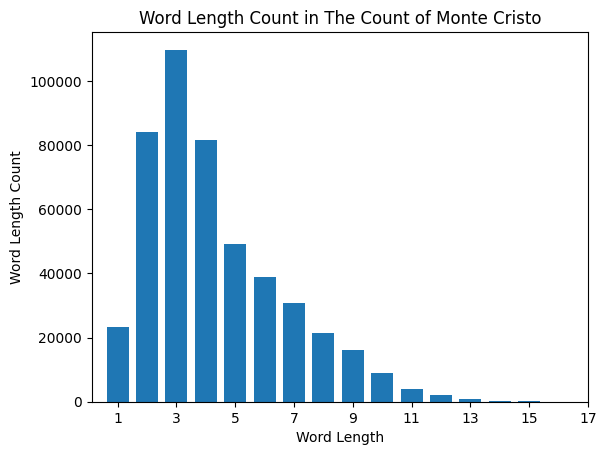

In [43]:
# Sort word length dictionary by length of word
wl_sorted = sorted(word_len_dict.items(), key=lambda x: x[0])

# Get X and Y values
# HINT: ref[2]
X_vals, Y_vals = zip(*wl_sorted)

# Plot the histogram for problem 1'
# HINT: ref[3]
plt.bar(X_vals, Y_vals, 0.75)
plt.xlim((.125, len(X_vals)))
plt.xticks(range(1,len(X_vals)+1,2))
plt.xlabel('Word Length')
plt.ylabel('Word Length Count')
plt.title('Word Length Count in The Count of Monte Cristo')
plt.show()

**References:**
- [1: pyplot tutorial](https://matplotlib.org/tutorials/introductory/pyplot.html)
- [2: zip](https://docs.python.org/3/library/functions.html#zip)
- [3: pyplot.bar](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html)

In the cell below, write the code for the visualization of results from Problem 2.

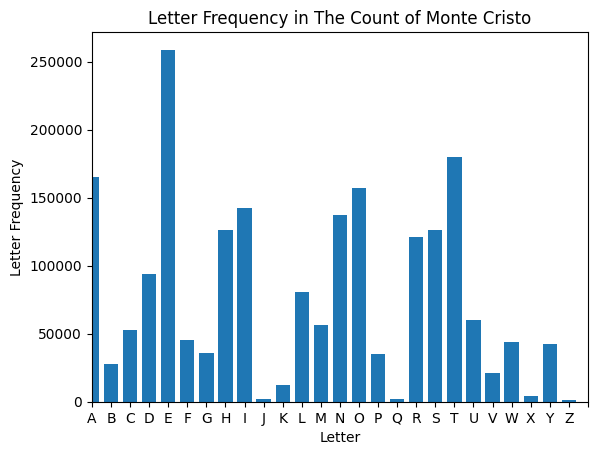

In [44]:
cc_sorted = sorted(char_count_dict.items(), key=lambda x: x[0])

# Get X and Y values
# HINT: ref[2]
X_vals, Y_vals = zip(*cc_sorted)

# Plot the histogram for problem 2
# HINT: ref[3]
plt.bar(X_vals, Y_vals, 0.75)
plt.xlim((.125, len(X_vals)))
plt.xticks(range(0,len(X_vals)+1,1))
plt.xlabel('Letter')
plt.ylabel('Letter Frequency')
plt.title('Letter Frequency in The Count of Monte Cristo')
plt.show()

In the cell below, write the code for the visualization of results from Problem 3.

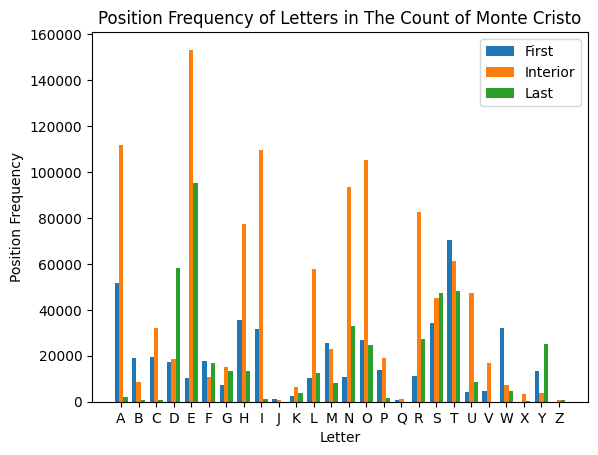

In [45]:
import numpy as np

cp_sorted = sorted(char_pos_dict.items(), key=lambda x: x[0])
X_vals, Y_vals = zip(*cp_sorted)

first = [Y_vals[i][0] for i in range(len(Y_vals))]
interior = [Y_vals[i][1] for i in range(len(Y_vals))]
last = [Y_vals[i][2] for i in range(len(Y_vals))]


# Plot the histogram for problem 3
x = np.array(range(len(X_vals)))
width = 0.25 

plt.bar(x - width, first, width=width, label='First')
plt.bar(x, interior, width=width, label='Interior')
plt.bar(x + width, last, width=width, label='Last')
plt.xticks(x, X_vals)
plt.xlabel('Letter')
plt.ylabel('Position Frequency')
plt.title('Position Frequency of Letters in The Count of Monte Cristo')
plt.legend()
plt.show()

### Problem 5:

**Question 1:** When analyzing text in a single, sequential manner, are there more efficient methods available? Please describe any faster techniques you've discovered, including why they're more effective.

Please document your findings, detailing the techniques identified and their advantages in terms of speed.

**Question 2:** What happens if you apply your code to a different manuscript, such as an ancient text or one in a non-English language?

Document your findings, including the title and link to the manuscript. Describe its features (e.g., language, age, length) and summarize your observations from running your code on this new manuscript.


*Provide your responses to the two questions below, clearly labeling them as "Answer 1" and "Answer 2.*

#### Answer 1
There are more advanced techniques to analyze text than counting words and characters. You can convert text into embeddings and vectors and see how semantically similar they are depending on the distance between two embedded vectors [[2]](https://stackoverflow.blog/2023/11/09/an-intuitive-introduction-to-text-embeddings/). Additionally, incorporating natural language processing and LLMs can dig deeper into relationships in the text. If it's the retrieval or lookup of text that needs to be faster, you can utilize hash maps and other data structures, so you don't need to scan the whole text sequentially. You can always try to break up the text into chunks and analyze them simultaneously with parallelism and multi-threading.


#### Answer 2
I compare the *The Count of Monte Cristo* with *Letters of John Keats to Fanny Brawne*[[3]](https://www.gutenberg.org/ebooks/60433). This English manuscript consists of letters written in the early 19th century by John Keats to his beloved Fanny Brawne. First, there are less words and characters than The Count of Monte Cristo since we are comparing letters to a book. Just like the book, the manuscript also has more words with shorter length than longer words. Although, the difference between word lengths 2 and 3 is much smaller than the book using the same comparison. Just like the book, the manuscript has the same six most common characters, but the difference is significantly more Os than As in the manuscript where it is opposite in the book. In the position frequency of the first 6 letters in the alphabet, the most outstanding number is 10,000 e's in the interior. None of the letters come close to 10,000. It does match up with the book also having a significant number of interior e's. If we look at all three histograms, the manuscript looks similar to the book. It makes sense that these two have similar trends since they were both published in the same 19th century.


#### Problems 1-3 with new text

In [46]:
with open('manuscript_john_keats.txt', 'r', encoding="utf8") as f:
        text_lines = f.readlines()

text_all = ''.join(text_lines)
text_alpha = re.sub(r'[^a-zA-Z]', ' ', text_all)
text_upper = text_alpha.upper()

print(text_upper[:1000])

 THE PROJECT GUTENBERG EBOOK OF LETTERS OF JOHN KEATS TO FANNY BRAWNE      THIS EBOOK IS FOR THE USE OF ANYONE ANYWHERE IN THE UNITED STATES AND MOST OTHER PARTS OF THE WORLD AT NO COST AND WITH ALMOST NO RESTRICTIONS WHATSOEVER  YOU MAY COPY IT  GIVE IT AWAY OR RE USE IT UNDER THE TERMS OF THE PROJECT GUTENBERG LICENSE INCLUDED WITH THIS EBOOK OR ONLINE AT WWW GUTENBERG ORG  IF YOU ARE NOT LOCATED IN THE UNITED STATES  YOU WILL HAVE TO CHECK THE LAWS OF THE COUNTRY WHERE YOU ARE LOCATED BEFORE USING THIS EBOOK   TITLE  LETTERS OF JOHN KEATS TO FANNY BRAWNE  AUTHOR  JOHN KEATS  EDITOR  H  BUXTON FORMAN  RELEASE DATE  OCTOBER          EBOOK                         MOST RECENTLY UPDATED  OCTOBER           LANGUAGE  ENGLISH  CREDITS  PRODUCED BY BRIAN FOLEY AND THE ONLINE DISTRIBUTED         PROOFREADING TEAM AT HTTP   WWW PGDP NET  THIS FILE WAS         PRODUCED FROM IMAGES GENEROUSLY MADE AVAILABLE BY THE         INTERNET ARCHIVE CANADIAN LIBRARIES        START OF THE PROJECT GUTENBERG 

In [47]:
# Convert the string of text into a list of words and remove empty words
words = [w for w in text_upper.split(' ') if w != '']

# Define dictionary to store count of word lengths
word_len_dict = {}

# Convert list of words to list of word lengths
lengths = [len(word) for word in words]

# Count the words of each length and store in the dictionary
for length in lengths:
    if length in word_len_dict:
        word_len_dict[length] += 1
    else:
        word_len_dict[length] = 1

# Sort word length by most common into a list of (word length, count) tuples
sorted_word_lengths = sorted(word_len_dict.items(), key=lambda x: x[1], reverse=True)


# Print the 6 most common word lengths
print("{:<12} : {:<8}".format("Word Length", "Count"))
for length, count in sorted_word_lengths[:6]:
    print("{:<12} : {:<8}".format(length, count))

Word Length  : Count   
2            : 6183    
3            : 6085    
4            : 5650    
5            : 3318    
6            : 2555    
7            : 2107    


In [48]:
# Concatenate the list of words into a string of characters
text = ''.join(words)

# Define a dictionary for counting letter frequency
char_count_dict = {c:0 for c in string.ascii_uppercase}

# Count the letters and store in the dictionary
for char in text:
    if char in char_count_dict:
        char_count_dict[char] += 1
    
# Sort letters by most common into a list of (letter, count) tuples
sorted_chars = sorted(char_count_dict.items(), key=lambda x: x[1], reverse=True)

# Print the 6 most common characters
print("{:<12} : {:<8}".format("Character", "Count"))
for char, count in sorted_chars[:6]:
    print("{:<12} : {:<8}".format(char, count))

Character    : Count   
E            : 16658   
T            : 12775   
O            : 10668   
A            : 9871    
I            : 9563    
N            : 9031    


In [49]:
# Define a dictionary for counting letter position frequency
char_pos_dict = {c:[0,0,0] for c in string.ascii_uppercase}

# Apply our letter location method to each word and sum values in our dictionary
for word in words:
    positions = lettersPosition(word)
    for char, pos in positions:
        if char in char_pos_dict:
            char_pos_dict[char][pos] += 1
        
# Print the position frequency of the first 6 letters in the alphabet
print("{:<10} : {:<8} | {:<8} | {:<6}".format("Character", "First", "Interior", "Last"))
for char in string.ascii_uppercase[:6]:
    print("{:<10} : {:<8} | {:<8} | {:<6}".format(
        char, char_pos_dict[char][0], char_pos_dict[char][1], char_pos_dict[char][2]
    ))

Character  : First    | Interior | Last  
A          : 3212     | 6622     | 37    
B          : 1422     | 692      | 8     
C          : 1085     | 2011     | 65    
D          : 971      | 1114     | 2570  
E          : 662      | 10023    | 5973  
F          : 1237     | 650      | 1304  


#### Problem 4 visualizations with new text

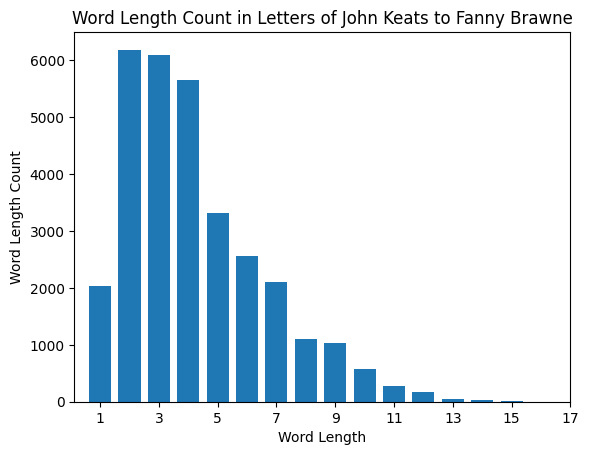

In [50]:
# Sort word length dictionary by length of word
wl_sorted = sorted(word_len_dict.items(), key=lambda x: x[0])

# Get X and Y values
# HINT: ref[2]
X_vals, Y_vals = zip(*wl_sorted)

# Plot the histogram for problem 1'
# HINT: ref[3]
plt.bar(X_vals, Y_vals, 0.75)
plt.xlim((.125, len(X_vals)))
plt.xticks(range(1,len(X_vals)+1,2))
plt.xlabel('Word Length')
plt.ylabel('Word Length Count')
plt.title('Word Length Count in Letters of John Keats to Fanny Brawne')
plt.show()

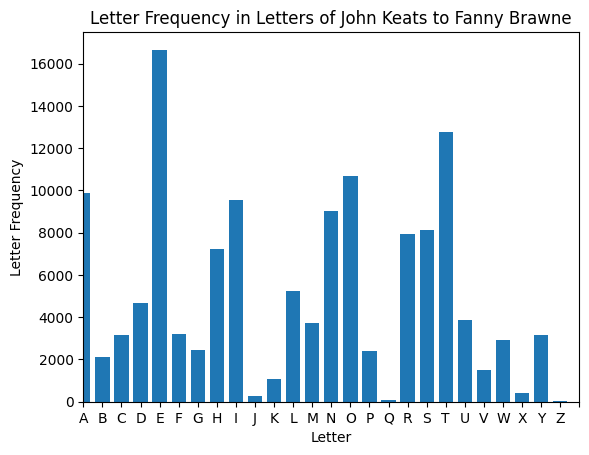

In [51]:
cc_sorted = sorted(char_count_dict.items(), key=lambda x: x[0])

# Get X and Y values
# HINT: ref[2]
X_vals, Y_vals = zip(*cc_sorted)

# Plot the histogram for problem 2
# HINT: ref[3]
plt.bar(X_vals, Y_vals, 0.75)
plt.xlim((.125, len(X_vals)))
plt.xticks(range(0,len(X_vals)+1,1))
plt.xlabel('Letter')
plt.ylabel('Letter Frequency')
plt.title('Letter Frequency in Letters of John Keats to Fanny Brawne')
plt.show()

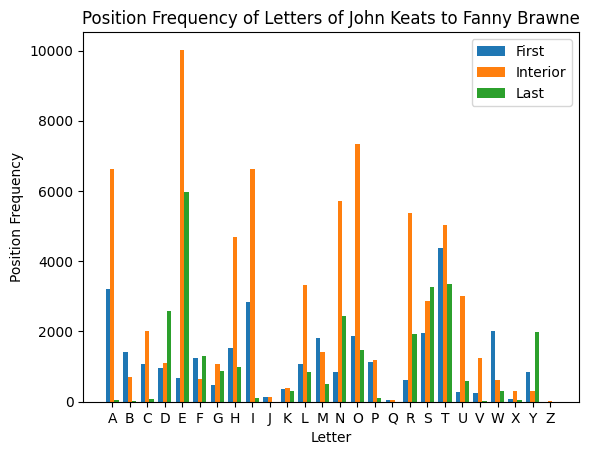

In [52]:
cp_sorted = sorted(char_pos_dict.items(), key=lambda x: x[0])
X_vals, Y_vals = zip(*cp_sorted)

first = [Y_vals[i][0] for i in range(len(Y_vals))]
interior = [Y_vals[i][1] for i in range(len(Y_vals))]
last = [Y_vals[i][2] for i in range(len(Y_vals))]


# Plot the histogram for problem 3
x = np.array(range(len(X_vals)))
width = 0.25 

plt.bar(x - width, first, width=width, label='First')
plt.bar(x, interior, width=width, label='Interior')
plt.bar(x + width, last, width=width, label='Last')
plt.xticks(x, X_vals)
plt.xlabel('Letter')
plt.ylabel('Position Frequency')
plt.title('Position Frequency of Letters of John Keats to Fanny Brawne')
plt.legend()
plt.show()

## Problem 6. Write the comprehensive README files for the assignment

**Note:** These directions are for a README file for your assignments. An more extensive README file should be used for your project. 

***Write the comprehensive README files for this assignment***

A comprehensive README file on GitHub is the primary information source for anyone exploring your repository. It is essential for clearly conveying your assignment's purpose, setup, and usage.

Key elements of a comprehensive README for an assignment include:

Assignment title: This should clearly state the name of your project.

Assignment description: Provide a concise overview of what the project entails. This section should explain the project's usefulness and the problems it addresses.

Installation instructions: Offer detailed steps for setting up the project. This includes any prerequisites, dependencies, and a step-by-step guide to operationalizing the project.

Use: Give clear instructions on how to use the project. Enhance this section with practical examples, including code snippets, screenshots, or videos.

Contact information: Detail how to contact you. This could be through email.

Acknowledgments: Credit any individuals, organizations, or other entities contributing significantly to the assignment.

**Add the README file to the GitHub repository with the solution of this assigment.**

## Reflect on your experience with the lecture and assignment:

Q1: Resource usage: What external resources (websites, books, etc.) did you consult while working on the problems? Please list them.

Q2: Debugging and error resolution: How often did you encounter and resolve errors or bugs during the assignment? Could you describe each occurrence in detail?

Q3: Gained knowledge: What lessons or insights you learned from solving these problems? How do you apply these insights in future coding projects or problem-solving scenarios?

Q4: Collaborative experiences: If you consulted with others, explain how this collaboration influenced your problem-solving approach. If you consulted with others, can you give an example of how you helped a peer or how a peer's advice helped you?

**Important Note:** Your reflections and experiences shared in response to these questions are as crucial as the solutions for the coding problems. Responses that are too brief or limited to a few words will not suffice and may  affect the pass grade for your assignment.

1. The only external resources I consulted were for problem 5 where I needed to look up fast techniques for analyzing text and find a different manuscript to test the code on. Although, the searches were minimal as my suggestions were mostly prior knowledge. I did specifically find an article about text embeddings to brush up on some knoweldge [[2]](https://stackoverflow.blog/2023/11/09/an-intuitive-introduction-to-text-embeddings/). since *The Count of Monte Cristo* was found on Project Gutenburg, I turned to the same source to find the manuscript *Letters of John Keats to Fanny Brawne* ebook [[3]](https://www.gutenberg.org/ebooks/60433).

2. The main debugging was representing the position frequency of letters cleanly. It mostly involved playing around with the x coordinates of the bars to make them easier to distinguish. Besides that, the only other minor bug was string formatting and matching the outputs of problems 1-3 to the given answers.

3. I never thought about finding the position frequency of letters, and it goes to show all the insights you can gain from analyzing text. I'm glad the assignment called for visualizing with matplotlib because it's hard to see relationships in these word counts and frequencies as plain numbers. It's good to brush up on skills with lists, dictionaries, and string manipulation, but I would say the best lesson from this assignment is matplotlib. I can imagine we'll use matplotlib in future assignments because it's a great way to display results.

4. I did not consult with others, but I think the only thing I would ask about is the matplotlib histograms, especially for the position frequencies. I think it's good to ask for feedback on visualizations to make sure the results are legible to all users.

## Reading Technical Papers

Choose one of the two papers from Lecture 3 to review:

- **"Memory-Efficient and Skew-Tolerant MapReduce over MPI for Supercomputing Systems" doi: 10.1109/TPDS.2019.2932066.**

- "A Scalable and Accurate Method for Classifying Protein–Ligand Binding Geometries Using a MapReduce Approach" doi: 10.1016/j.compbiomed.2012.05.001

After selecting a paper, complete these steps:

- Read the title, abstract, and introduction.

- Review the section and sub-section headings without reading the full text.

- Read the conclusions.

- Briefly look over the references, noting any you are familiar with.

Once you've done this, address the following questions:

**Set of questions A:** This set of questions must be answered by 426/526 students in the course.

For the paper you have chosen:

* Look carefully at the figures, diagrams and other illustrations in the paper. Pay special attention to graphs. 

At the end of these steps, answer the following questions:

* Are the axes properly labeled? Are results shown with error bars, so that conclusions are statistically significant? 

* Select one figure, diagram or other illustration and describe it with your words. What does the figure, diagram or other illustration show? What is the take-away from the figure, diagram or other illustration? (Use between 100 and 200 words)

**Category:** Identify the type of paper. Is it a measurement study, an analysis of an existing system, a description of a research prototype, or a definition of a concept/paradigm?

**Context:** Relate the paper to other works. What other papers does it reference? What theoretical frameworks are used to analyze the problem?

**Correctness:**  Assess the validity of the paper's assumptions.

**Contributions:** Identify the main contributions of the paper.

**Clarity:** Evaluate the writing quality. Is the paper well written?

### Set A Answers

**Category:** It's an analysis and improvement to a pre-existing MapReducer framework called Mimir.

**Context:** Since this paper focuses on optimizing an existing system, they made sure to include previously done research on efficient MapReduce implementations for supercomputers. In the intro, they categorize past research into two categories: "tuning and deployment of popular MapReduce frameworks on high-performance computers [8], [23], [29], [36]" and "design and building of new implementations of MapReduce on top of MPI (e.g., MapReduce-MPI, or MR-MPI [27] and Mimir [15])". Knowing what others have done helps you determine how your solution brings something intellectually new to the conversation.

- [8] N. Chaimov, A. Malony, S. Canon, C. Iancu, K. Z. Ibrahim, and
J. Srinivasan, “Scaling spark on HPC systems,” in Proc. 25th ACM Int. Symp. High-Perform. Parallel Distrib. Comput., 2016, pp. 97–110.
- [15] N. Chaimov, A. Malony, S. Canon, C. Iancu, K. Z. Ibrahim, and
J. Srinivasan, “Scaling spark on HPC systems,” in Proc. 25th ACM Int. Symp. High-Perform. Parallel Distrib. Comput., 2016, pp. 97–110.
- [23] X. Lu, M. W. U. Rahman, N. Islam, D. Shankar, and D. K. Panda,
“Accelerating spark with RDMA for big data processing: Early experiences,” in Proc. IEEE 22nd Annu. Symp. High-Perform. Interconnects, 2014, pp. 9–16.
- [27] S.-J. Sul and A. Tovchigrechko, “Parallelizing BLAST and SOM algorithms with MapReduce-MPI library,” in Proc. IEEE Int. Symp. Parallel Distrib. Process. Workshops Phd Forum, 2011, pp. 481–489.
- [29] Y. Wang, R. Goldstone, W. Yu, and T. Wang, “Characterization
and optimization of memory-resident MapReduce on HPC systems,” in Proc. IEEE 28th Int. Parallel Distrib. Process. Symp., 2014, pp. 799–808.
- [36] X. Yang, N. Liu, B. Feng, X.-H. Sun, and S. Zhou, “PortHadoop:
Support direct HPC data processing in Hadoop,” in Proc. IEEE Int. Conf. Big Data, 2015, pp. 223–232.



**Correctness:** 
I am not too familiar with using MapReduce on supercomputers, but their research question to see if they can optimize that area further is valid. Their conclusion mentioned that their optimizations balance memory usage for highly skewed datasets, reduce execution time, and use less or equal memory. One thing that seems incorrect or misleading is that they concluded that they reduced "execution time up to 5 times for a diverse set of case studies", but they specified or maybe wanted to reduce execution time up to 12 times. The other claims seem to be supported by their graphs.



**Contributions:**
1) Their design builds on Mimir and includes "(a) a pipeline combiner workflow to use memory more efficiently and balance memory usage; (b) a new dynamic repartition method that mitigates data skew on MapReduce applications without obviously increasing their peak memory usage; and (c) a strategy for splitting single superkeys across processes and further mitigating the impact of data skew, by relaxing the MapReduce model constraints on key partitioning."
2) Evaluate Mimir using three benchmarks (word count, octree clustering, and join) and three types of datasets (balanced data, value imbalanced data, and key-mapping imbalanced data).


**Clarity:** 
Due to my unfamiliarity with the field, it's more technical than what I'm used to. However, the more general sections like the introduction and conclusion are well written. A good paper should make it easy to find the research question, contributions, and summarized results.

**Set of questions B:** This set of questions must be answered by 526 students in the course.

After selecting your paper, follow these instructions:

Examine the figures, diagrams, and other illustrations in the paper, focusing especially on any graphs.
Then, respond to the following questions:

**Graph Quality:** Check if the axes in the graphs are properly labeled. Are there error bars included to indicate statistical significance in the results?

**Illustration Analysis:** Choose one figure, diagram, or illustration and describe it in detail. What does this visual representation convey? Summarize the key message or takeaway from this graphic in 100 to 200 words.


### Set B Answers

**Graph Quality:** 
It could be my ignorance, but I'm bothered by the lack of units for the OC and Join dataset sizes. WC dataset size clearly has GB units, but I don't know about the others. The text also seems to leave out units like "(i.e., 256 MB for the WC, 2^25 for OC, and 25 M for Join)". Other than that, the axes are labeled and error bars, while pretty small, are also included.


**Illustration Analysis:** 
This paper relies on the readers to understand MapReduce, so they included Figure 1 to explain the map, shuffle, and reduce phases of the MapReduce programming model. Solely just looking at the graphic, there are input records that are processed using map functions to generate key-value pairs. The key-value pairs enter this shuffling phase where they are distributed across all processes. Pairs with the same key are merged and stored in lists with the keys and multiple values. These key-multiple value pairs are processed with reduce functions and output records. The figure shows that there can be multiple map and reduce functions while there is only one shuffling phase.

## CREATE YOUR ACCESS ACCOUNT FOR THE JETSTREAM CLOUD

Visit https://allocations.access-ci.org/.

Click on the "Create Account" button.

Choose the “Register with an existing identity” option and then select “University of Tennessee”. Follow the steps to authenticate.

Once your account is created, submit your ACCESS username at https://forms.gle/TzFRZaBCrbhymGoA8

Wait for a notification confirming that you have been added to the system. You cannot proceed with the next steps until you receive this confirmation.

### This task must be done before Feb 21, 2025.
